# Models for Node-red Project (Internet of Things)
#### Made by: Miguel Carvalho, nº54399

#### At start, import necessary libraries and define pattern attributes (as provided by our professor)

In [1]:
import pandas as pd
import numpy as np

from joblib import dump, load
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from matplotlib import pyplot as pl

FILE_OFFLINE = 'historical.data'
FILE_ONLINE = 'online.data'

ONE_DAY = 48              
ONE_HOUR = 2             
THREE_HOURS = 3 * ONE_HOUR
SIX_HOURS = 6 * ONE_HOUR

PREDICTION_HORIZON = 4    

def scale(x, minv, maxv):
    return (x - minv) / (maxv - minv)

def unscale(x, minv, maxv):
    return ((maxv - minv) * x) + minv

#### Transform file data into manageable data (to numpy)

In [2]:
offline_data = pd.read_csv(FILE_OFFLINE)
online_data = pd.read_csv(FILE_ONLINE)

off_outside = offline_data.loc[offline_data['label'] == 'outside']
off_inside = offline_data.loc[offline_data['label'] == 'inside']

on_outside = online_data.loc[online_data['label'] == 'outside']
on_inside = online_data.loc[online_data['label'] == 'inside']

off_insideT = off_inside['temperature'].to_numpy()
off_outsideT = off_outside['temperature'].to_numpy()

on_insideT = on_inside['temperature'].to_numpy()
on_outsideT = on_outside['temperature'].to_numpy()

# Dataset patterns

#### As following, we describe temperature patterns and how data manifests inside each file

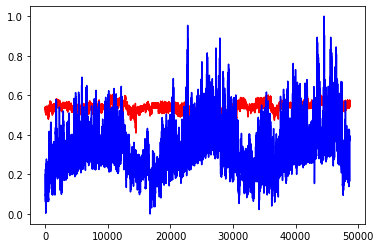

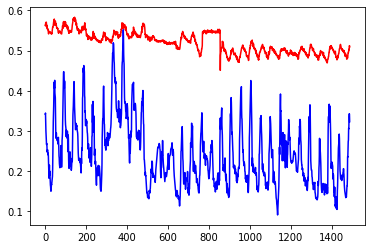

In [5]:
minT = min(off_insideT.min(), off_outsideT.min(), on_insideT.min(), on_outsideT.min())
maxT = max(off_insideT.max(), off_outsideT.max(), on_insideT.max(), on_outsideT.max())

off_insideT = scale(off_insideT, minT, maxT)
off_outsideT = scale(off_outsideT, minT, maxT)

on_insideT = scale(on_insideT, minT, maxT)
on_outsideT = scale(on_outsideT, minT, maxT)

pl.plot(off_insideT,'r')
pl.plot(off_outsideT,'b')
pl.show()

pl.plot(on_insideT,'r')
pl.plot(on_outsideT,'b')
pl.show()


# Outside

#### Here we fully describe the models used associated with the outside values of historical.data, so that it is possible to predict information

In [6]:
N = off_outsideT.size - (ONE_DAY + 1)

index_regressor = np.ones((N, ONE_DAY + 1), int)
index_regressor[:, 0] = index_regressor[:,0].cumsum()
index_regressor = index_regressor.cumsum(1)

index_regressor = index_regressor.flatten()

N_one = on_insideT.size - (ONE_DAY + 1)

index_regressor_one = np.ones((N_one, ONE_DAY + 1), int)
index_regressor_one[:, 0] = index_regressor_one[:,0].cumsum()
index_regressor_one = index_regressor_one.cumsum(1)

index_regressor_one = index_regressor_one.flatten()

DataSetOut = off_outsideT[index_regressor]

DataSetOut = DataSetOut.reshape(((N, ONE_DAY + 1)))
DataSetInOnline = on_insideT[index_regressor_one]
DataSetInOnline = DataSetInOnline.reshape(((N_one, ONE_DAY + 1)))

TrainSetOut = DataSetOut[: round(N * 0.7), :].copy()
TestSetOut = DataSetOut[round(N * 0.7) :, :].copy()
OnlineInSimple = DataSetInOnline[: round(N * 0.7), :].copy()

In [7]:
N = off_insideT.size - (ONE_DAY + 1)

index_regressor = np.ones((N, ONE_DAY + 1), int)
index_regressor[:, 0] = index_regressor[:,0].cumsum()
index_regressor = index_regressor.cumsum(1)

index_regressor = index_regressor.flatten()

DataSetInSimple = off_insideT[index_regressor]

DataSetInSimple = DataSetInSimple.reshape(((N, ONE_DAY + 1)))

TrainSetInSimple = DataSetInSimple[: round(N * 0.7), :].copy()
TestSetInSimple = DataSetInSimple[round(N * 0.7) :, :].copy()

In [8]:
def test_network(name, layers, max_iter, tol, extra_info=True):

    modelOutT = load("outside_pure.skl")
    
    predictions = modelOutT.predict(TestSetOut[:, : ONE_DAY])
    
    def plot_predict_vs_real(predict, real):
        pl.plot(real, 'k')
        pl.plot(predict, 'r')
        pl.show()
    
    real_temperatures = [x[-2] for x in TestSetOut]
    
    print("R^2 =", metrics.r2_score(real_temperatures, predictions))
    print("mse =",metrics.mean_squared_log_error(real_temperatures, predictions))
   
    plot_predict_vs_real(predictions[: ONE_DAY * 7], TestSetOut[: ONE_DAY * 7, ONE_DAY])
    
    

# Model A ((4, 3), 500, 0.00001)

R^2 = 0.9853859195757715
mse = 0.00015920928482753563


c:\Users\migue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.1.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


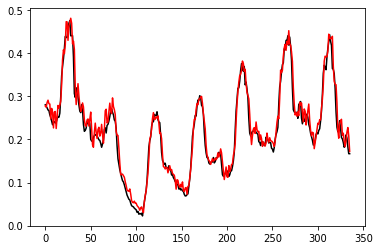

In [10]:
test_network("test", (4,3), 500, 0.00001, True) 

# Model B (10, 10)

R^2 = 0.9853859195757715
mse = 0.00015920928482753563


c:\Users\migue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.1.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


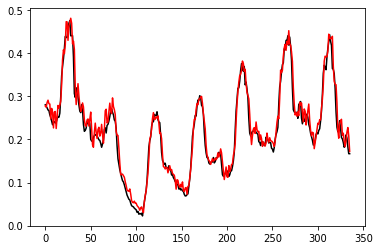

In [11]:
test_network("ten_ten", (10,10), 500, 0.00001, True)

# Model C ((200, 200), 500, 0.00001)

R^2 = 0.9853859195757715
mse = 0.00015920928482753563


c:\Users\migue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.1.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


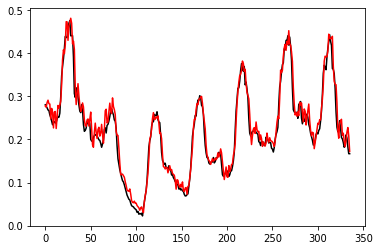

In [12]:
test_network("test_2", (200,200,200), 500, 0.00001, True)

# Inside

#### In this section we describe the model used to predict inside values. We only consider the inside value and do not depend on the outside values because the cost of adding another feature is higher than the return of the performance and accuracy made by a more complex model. So, for simplicity reasons, we made our model only consider inside data.

In [13]:
def test_network_inside_simple(layers, max_iter, tol, extra_info=True):

    modelInSimpleT = load("inside_pure.skl")

    # Lets evaluate the model on the test set data

    predictions = modelInSimpleT.predict(TestSetInSimple[:, : ONE_DAY])

    def plot_predict_vs_real(predict, real):
        pl.plot(real, 'k')
        pl.plot(predict, 'r')
        pl.show()

    real_temperatures = [x[-2] for x in TestSetInSimple]

    print("R^2 =", metrics.r2_score(real_temperatures, predictions))
    print("mse =",metrics.mean_squared_log_error(real_temperatures, predictions))
    
    plot_predict_vs_real(predictions[: ONE_DAY * 7], TestSetInSimple[: ONE_DAY * 7, ONE_DAY])

# Model A ((500, 500), 500, 0.00001)

R^2 = 0.9856158141506124
mse = 2.2015835902947465e-06


c:\Users\migue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.1.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


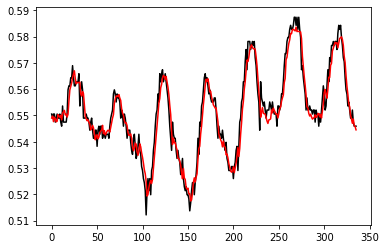

In [15]:
test_network_inside_simple((500,500), 500, 0.00001, False)

R^2 = 0.9856158141506124
mse = 2.2015835902947465e-06


c:\Users\migue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.1.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


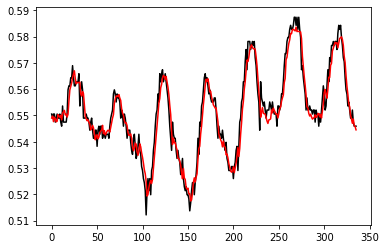

In [17]:
test_network_inside_simple((1000,1000), 500, 0.00001, False)